In [1]:

import numpy as np 
import pandas as pd
df=pd.read_csv(r'/kaggle/input/walmart-sales/Walmart_Sales.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [2]:
#Below are some worth asking questions that we are going to solve and these questions will give us 
#oppotunities to test our analysis skills and business understanding so lets dive into it .

**🔹 High-Impact Sales Insights

How do weekly sales vary across different stores? (Identifies top-performing & struggling stores for better strategy)

Are certain months more profitable for Walmart? (Helps in inventory and staffing decisions for peak sales periods)

Which store has the highest average weekly sales? Why? (Finds best-performing stores & reasons behind their success)

Which store shows the most sales fluctuation over time? (Detects unstable stores that might need better demand planning)

What is the best time to offer discounts to maximize sales? (Optimizes promotional timing to boost revenue)


🔹 Holiday & Seasonal Impact
Do holiday weeks significantly impact weekly sales? (Shows if holiday promotions work & when to invest more in ads/stock)

Which holidays bring the highest sales boost? (Finds the most profitable holiday periods to focus marketing efforts on)

🔹 Economic & External Factors

How does fuel price fluctuation impact sales? (Detects if higher fuel costs reduce customer spending at Walmart)

Does the unemployment rate affect Walmart's sales? (Finds how economic downturns impact consumer spending at Walmart)

Is there a correlation between temperature and sales? (Checks if extreme weather affects shopping behavior, useful for regional strategies)
**

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
#High impact sales insights 
#(1) How do weekly sales vary across different stores? 
#(Identifies top-performing & struggling stores for better strategy)

df['Date']=pd.to_datetime(df['Date'],format='mixed')
print(df['Date'].info())
#converted the type of date column to date type


<class 'pandas.core.series.Series'>
RangeIndex: 6435 entries, 0 to 6434
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
6435 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 50.4 KB
None


<Axes: xlabel='Store', ylabel='Weekly_Sales'>

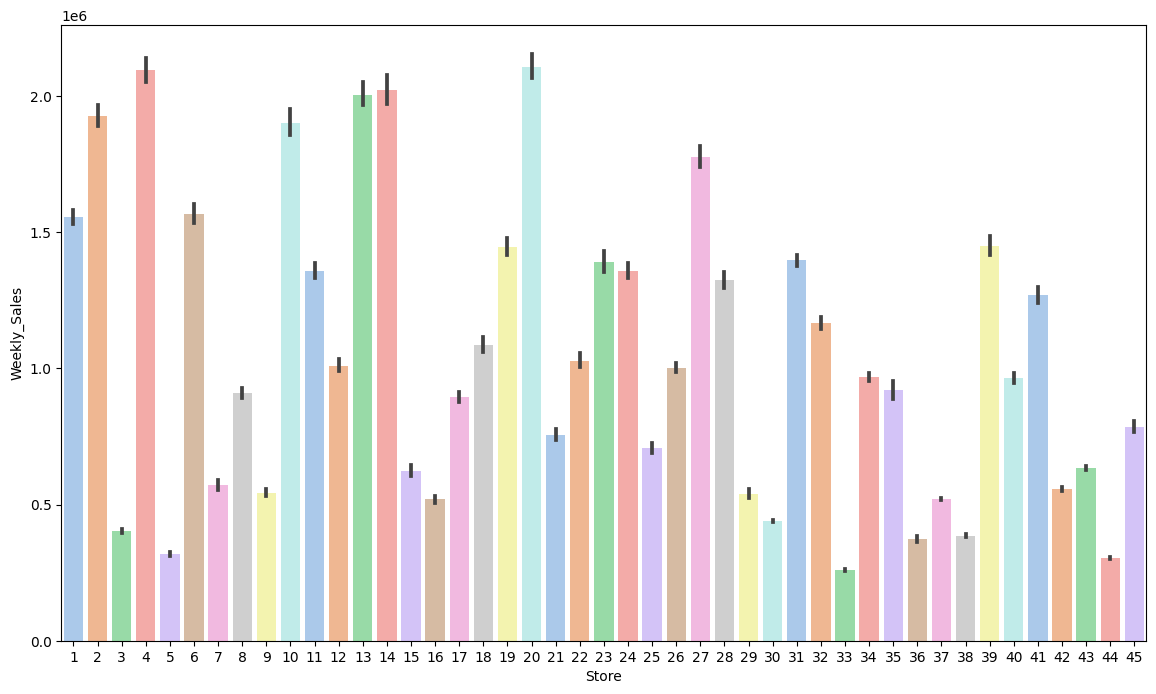

In [5]:
#Now we are going to see how weekly sales vary across different stores
WeeklySales=df.groupby('Store')['Weekly_Sales'].mean().reset_index()
WeeklySales
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14,8))

sns.barplot(x=df['Store'],y=df['Weekly_Sales'],data=WeeklySales,palette='pastel')


      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
286       3 2010-05-02     461622.22             0        45.71       2.572   
287       3 2010-12-02     420728.96             1        47.93       2.548   
288       3 2010-02-19     421642.19             0        47.07       2.514   
289       3 2010-02-26     407204.86             0        52.05       2.561   
290       3 2010-05-03     415202.04             0        53.04       2.625   
...     ...        ...           ...           ...          ...         ...   
6287     44 2012-09-28     355307.94             0        64.80       3.821   
6288     44 2012-05-10     337390.44             0        61.79       3.815   
6289     44 2012-12-10     337796.13             0        55.10       3.797   
6290     44 2012-10-19     323766.77             0        52.06       3.781   
6291     44 2012-10-26     361067.07             0        46.97       3.755   

             CPI  Unemployment  
286   214.424881  

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

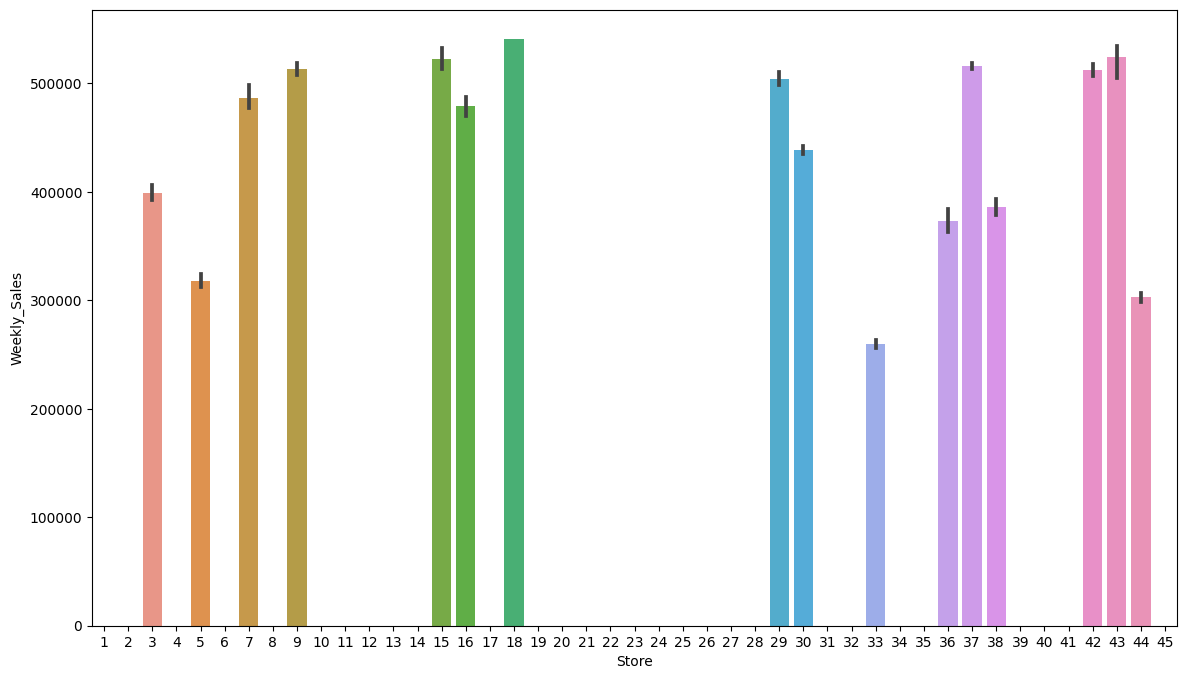

In [6]:
first_q = df['Weekly_Sales'].quantile(0.25)

# Correctly combining conditions with parentheses
filteredSales1 = df[(df['Weekly_Sales'] > 0) & (df['Weekly_Sales'] < first_q)]

print(filteredSales1)
#These stores are poor performing and need critical attention
plt.figure(figsize=(14,8))
sns.barplot(x=df['Store'],y=filteredSales1['Weekly_Sales'],data=filteredSales1)

**Hence we figured out which stores are poor performing and now the company can investigate as what is that that is doing harm to these stores.**

**Now we shall also look at the top performing stores because these stores is the topmost source of revenue for the company and they must be well looked after and any change to them can significantly affect company's performance**

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
5         1 2010-12-03    1439541.59             0        57.79       2.667   
...     ...        ...           ...           ...          ...         ...   
5851     41 2012-10-08    1504545.94             0        71.73       3.509   
5852     41 2012-08-17    1560590.05             0        65.77       3.545   
5853     41 2012-08-24    1464462.85             0        69.07       3.558   
6338     45 2010-12-24    1682862.03             0        30.59       3.141   
6390     45 2011-12-23    1521957.99             0        42.27       3.389   

             CPI  Unemployment  
0     211.096358  

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

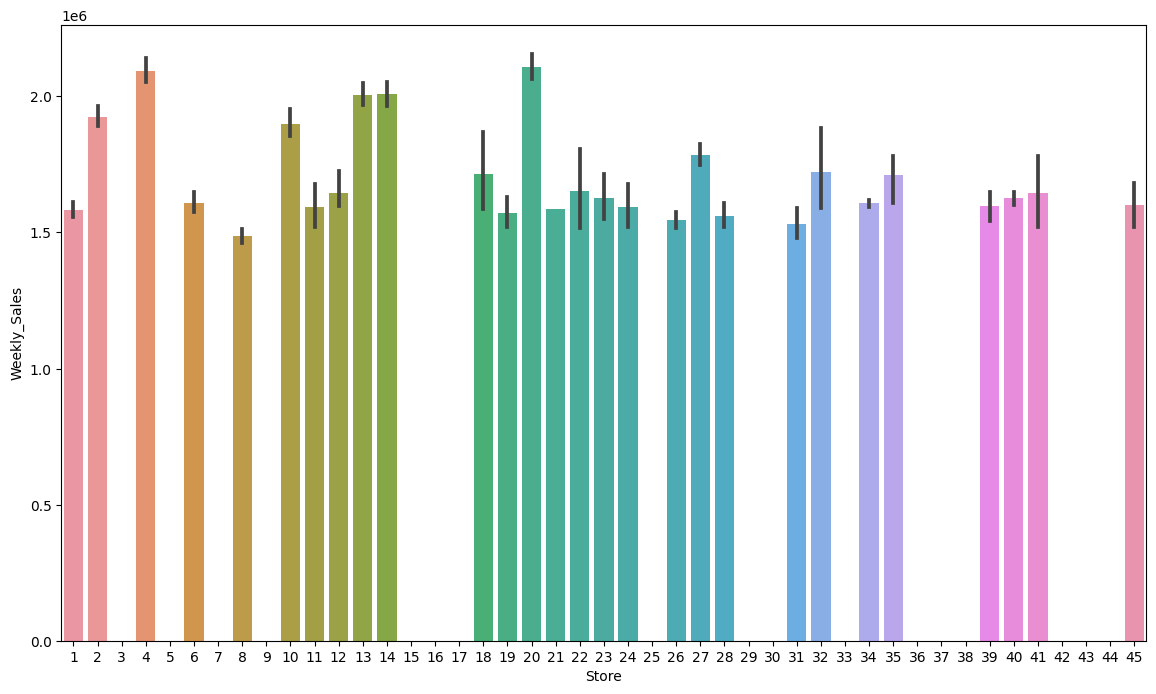

In [7]:
fourth_q = df['Weekly_Sales'].quantile(1.00)

# Correctly combining conditions with parentheses
filteredSales2 = df[(df['Weekly_Sales'] > df['Weekly_Sales'].quantile(0.75)) & (df['Weekly_Sales'] < df['Weekly_Sales'].quantile(1.00))]

print(filteredSales2)
#These stores are performing amazingly 
plt.figure(figsize=(14,8))
sns.barplot(x=df['Store'],y=filteredSales2['Weekly_Sales'],data=filteredSales2)

**So this concludes our report and above is the chart showing promising stores that with some extra focus can be taken to new heights.These stores come in the top 25% in terms of revenue**

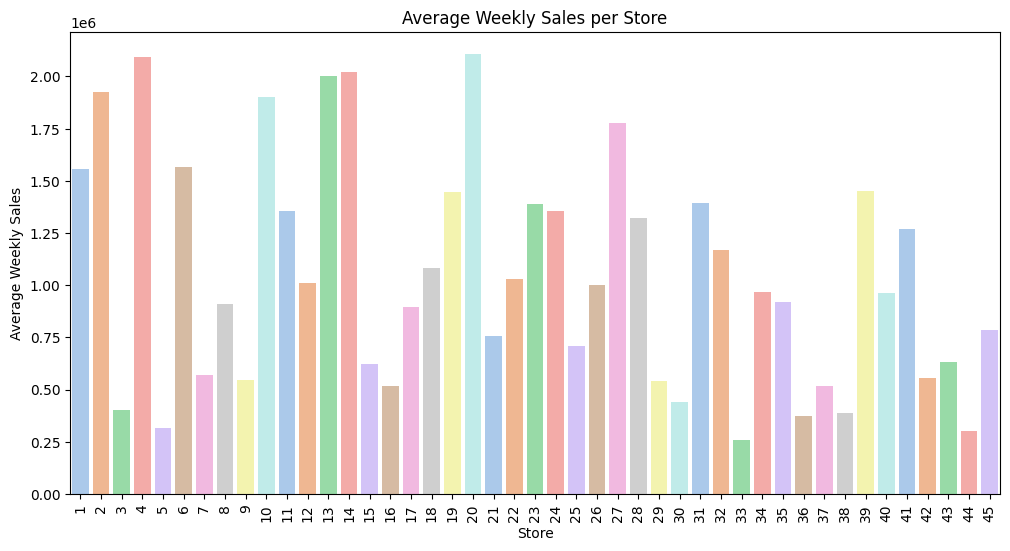

In [8]:
avg_sales=df.groupby('Store')['Weekly_Sales'].mean().reset_index()
avg_sales = avg_sales.sort_values(by='Store',ascending=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sales['Store'],y=avg_sales['Weekly_Sales'],palette='pastel')
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.title("Average Weekly Sales per Store")
plt.xticks(rotation=90)  # Rotate store labels if necessary
plt.show()

**Now we are going to look at most sales fluctuation suffering stores . their identification will help us to fix the system**

In [9]:
df['fluctuation']=df['Weekly_Sales'].diff().abs()
df['fluctuation']
store_fluc=df.groupby('Store')['fluctuation'].mean().reset_index()
store_fluc

,Store,fluctuation
0,1,121093.910986
1,2,143184.479930
2,3,38123.890699
3,4,157483.520280
4,5,38039.297413
5,6,136529.273636
6,7,59135.330210
7,8,70969.808811
8,9,42630.748881
9,10,150824.919720


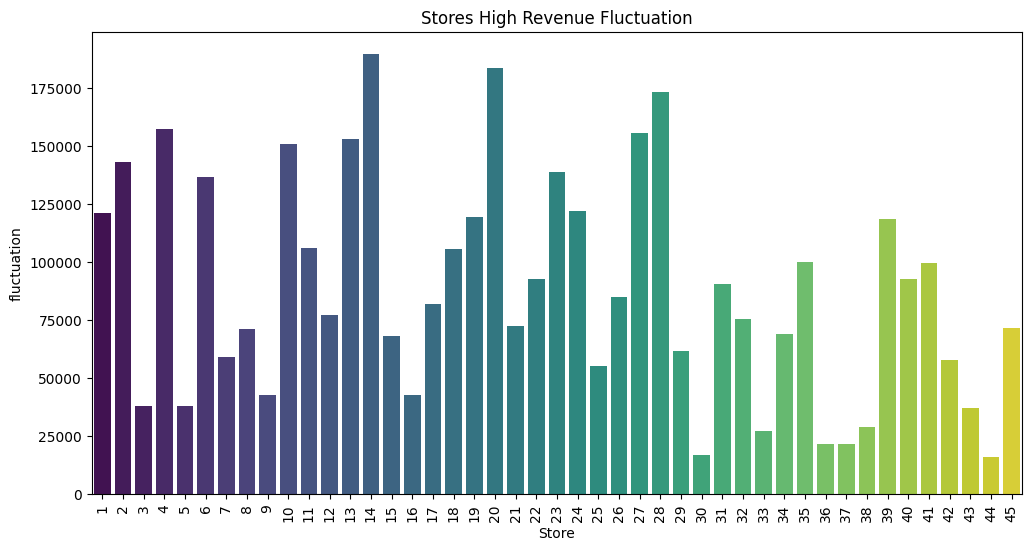

In [10]:
#plotting this will give us a better idea of the situation

plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='fluctuation', data=store_fluc, palette='viridis')
plt.xticks(rotation=90)
plt.title("Stores High Revenue Fluctuation")
plt.show()

**The above chart can further be analysed to see some very vulnerable stores , those whose fluctuation is above $ 100000 and by identifying them we can fix them and increase our revenue**

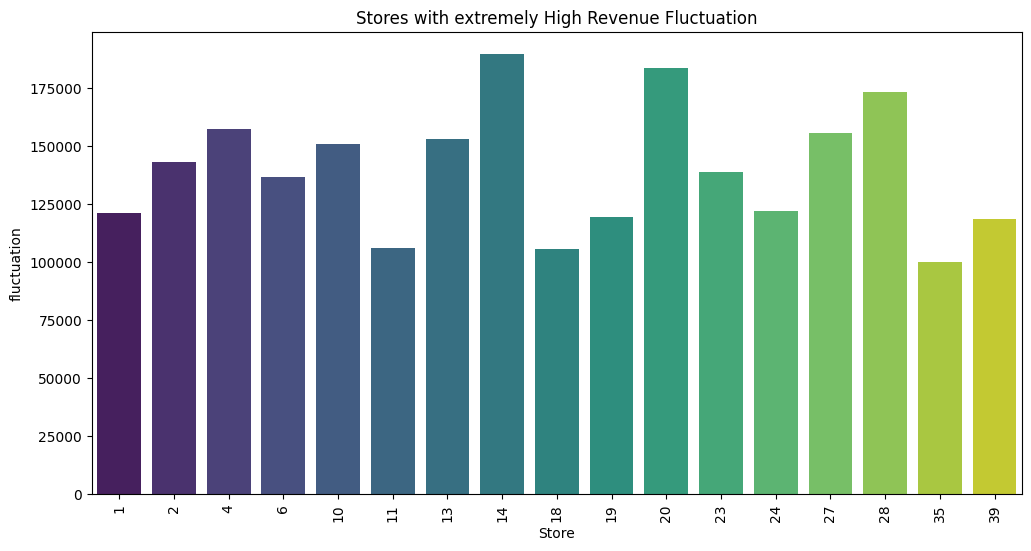

In [11]:
extreme_fluc=store_fluc[store_fluc['fluctuation']>100000]
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='fluctuation', data=extreme_fluc, palette='viridis')
plt.xticks(rotation=90)
plt.title("Stores with extremely High Revenue Fluctuation")
plt.show()

**What is the best time to offer discounts to maximize sales? (Optimizes promotional timing to boost revenue).We are going to answer and analyse this part**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


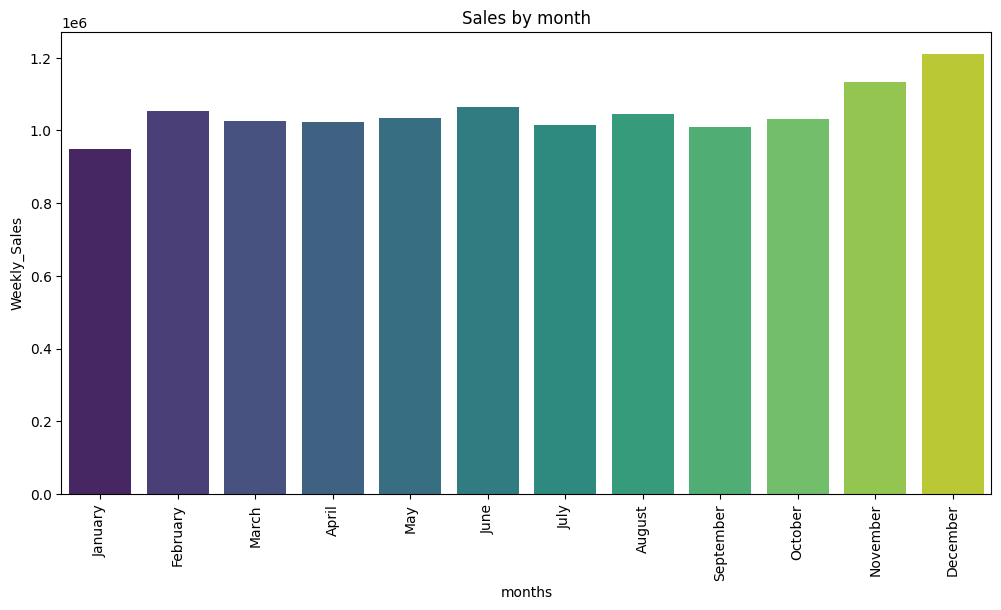

In [12]:
df['months']=df['Date'].dt.strftime('%B')

rev_by_month=df.groupby('months')['Weekly_Sales'].mean().reset_index()
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
rev_by_month['months'] = pd.Categorical(rev_by_month['months'], categories=month_order, ordered=True)
rev_by_month = rev_by_month.sort_values('months')

plt.figure(figsize=(12, 6))
sns.barplot(x='months', y='Weekly_Sales', data=rev_by_month,palette='viridis')
plt.xticks(rotation=90)
plt.title("Sales by month")
plt.show()

**This chart is showing a very clear trend that the sales are the lowest in january but then it rises in the month of february and remains constant until october.The situation again changes when November starts and then the sales continues to increase and the peak sales happen in December so we can conclude that due November and December being festival heavy months people tend to buy more but once january starts the sales drop significantly and the rest of the months are doing pretty consistently.Therefore we can give good discounts in january which will encourage people to spend**

**Just like I mentioned that giving discounts in january will increase sales same is the case with December because already sales are high and giving some discount in this month will give a big boost to the already high sales**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

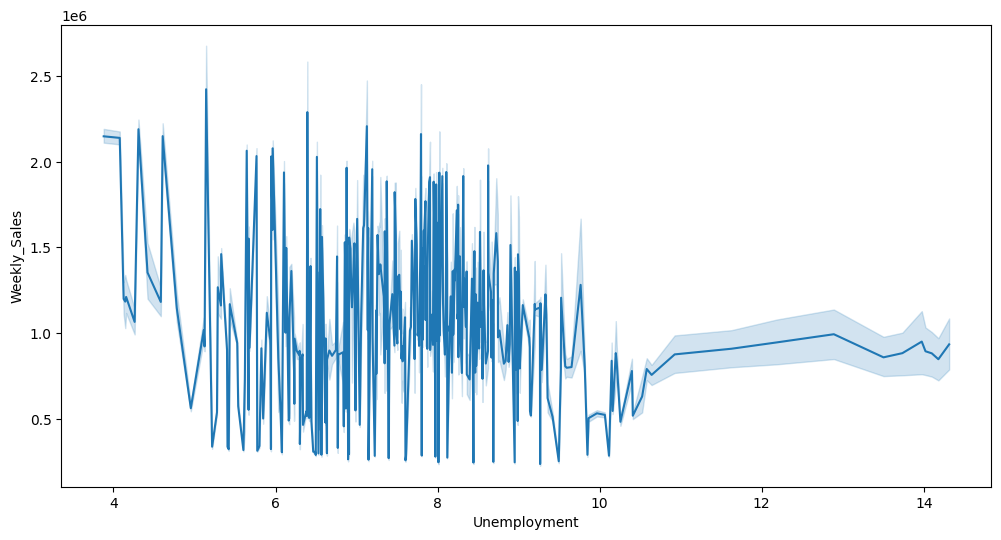

In [19]:
sales_by_unemployment = df.groupby('Weekly_Sales')['Unemployment'].mean().reset_index()
sales_by_unemployment
plt.figure(figsize=(12, 6))

sns.lineplot(x='Unemployment',y='Weekly_Sales',data=sales_by_unemployment)

**The above lineplot depicts a very interesting picture in which we can see that at large when unemployment is less people tend to buy more and hence the sales are high but as unemployment rises the sales drop clearly indicating that people save money during their period and unemployment**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

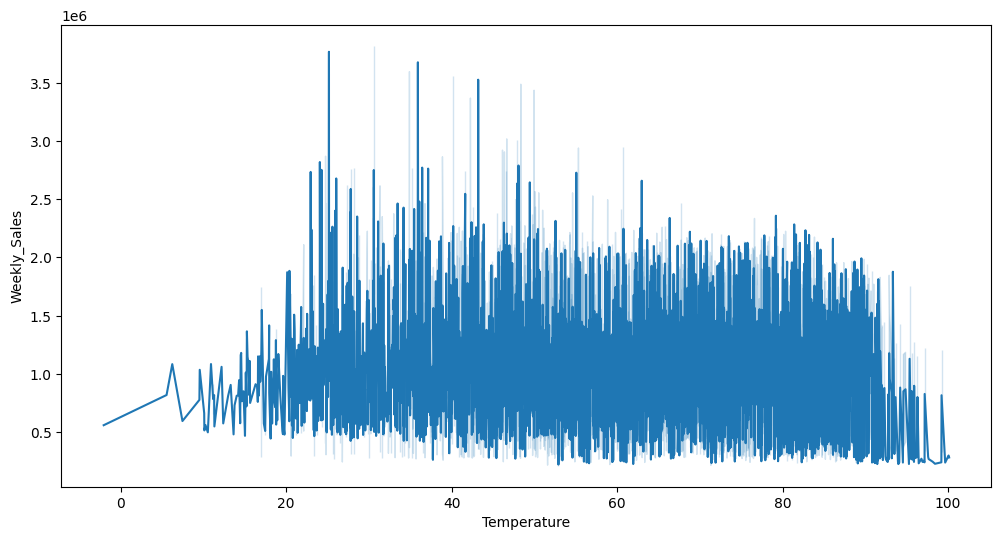

In [20]:
sales_by_temp=df.groupby('Weekly_Sales')['Temperature'].mean().reset_index()
sales_by_temp
plt.figure(figsize=(12, 6))

sns.lineplot(x='Temperature',y='Weekly_Sales',data=sales_by_temp)

**The above chart is showing that the temperature is below 20 sales drop probabily because colder temperatures discourage people to get out from their comfort zone and therefore sales drop below 20 degree.We can clearly see that sales are pretty good when the temperature is between 20 and 60 degrees and that is the perfect weather people would go out for shopping.Just like extreme cold conditions discourage people so are hot temperatures as at temperature above 80 degrees the sales start to decline significantly so the temperauture and weather heavily affect the number of sales**

**I have put in a lot of effort into this Walmart sales analysis, tried to answer the above questions and drawing out value from this analysis. This project was an exciting opportunity to apply data analysis techniques and draw valuable insights that could have a real-world impact on business strategy.**

**If you found this analysis useful or insightful, please consider upvoting it. Your support means a lot and helps me continue creating valuable content. Thank you!**